In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('flavors_of_cacao.csv').dropna()
df.head(6)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


In [3]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [4]:
df.columns = ['Company', 'SpecificBeanOrigin', 'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType', 'BroadBeanOrigin']

In [5]:
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


<h1>Exploring the Dataset</h1>

How many tuples are there in the dataset?

In [6]:
# df.shape[0] 
len(df)

1793

How many unique company names are there in the dataset?

In [7]:
df = df.rename(columns={df.columns[0]: "Company"})

In [8]:
len(pd.unique(df['Company']))

416

How many reviews are made in 2013 in the dataset?

In [9]:
len(df.loc[df['ReviewDate'] == 2013])

184

In [10]:
df.groupby(["ReviewDate"]).count()

,Company,SpecificBeanOrigin,REF,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
ReviewDate,,,,,,,,
2006,72,72,72,72,72,72,72,72
2007,77,77,77,77,77,77,77,77
2008,93,93,93,93,93,93,93,93
2009,123,123,123,123,123,123,123,123
2010,111,111,111,111,111,111,111,111
2011,164,164,164,164,164,164,164,164
2012,194,194,194,194,194,194,194,194
2013,184,184,184,184,184,184,184,184
2014,247,247,247,247,247,247,247,247


In [11]:
df[df.ReviewDate == 2013]

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
10,A. Morin,Panama,1011,2013,70%,France,2.75,,Panama
11,A. Morin,Madagascar,1011,2013,70%,France,3.00,Criollo,Madagascar
12,A. Morin,Brazil,1011,2013,70%,France,3.25,,Brazil
13,A. Morin,Equateur,1011,2013,70%,France,3.75,,Ecuador
14,A. Morin,Colombie,1015,2013,70%,France,2.75,,Colombia
...,...,...,...,...,...,...,...,...,...
1738,Wilkie's Organic,Amazonas w/ nibs,1173,2013,75%,Ireland,2.75,Criollo,Peru
1741,Willie's Cacao,"Java, Indonesian Black",1109,2013,100%,U.K.,2.25,,Indonesia
1751,Woodblock,"Camino Verde P., Balao, Guayas",1042,2013,70%,U.S.A.,3.25,,Ecuador
1752,Woodblock,Gran Couva,1042,2013,70%,U.S.A.,3.50,Trinitario,Trinidad


In the BeanType column, how many missing values are there?

In [12]:
df["BeanType"][0]

'\xa0'

In [13]:
df[df.BeanType == '\xa0']

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic
1789,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


<h1>Visualization</h1>

Visualize the rating column with a histogram!

In [17]:
import matplotlib.pyplot as plt

In [18]:
ratings =df.Rating.values

Text(0.5, 0, 'ratings')

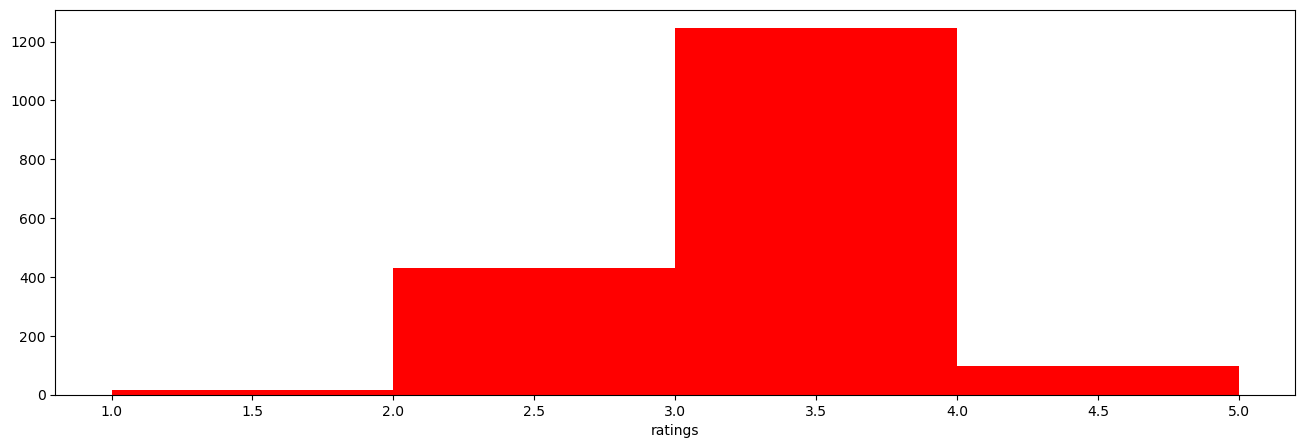

In [19]:
plt.figure(figsize = (16,5))
plt.hist(ratings, bins=4, color='red')
plt.xlabel("ratings")

Comment on the resulting figure!

Convert and Visualize

In [20]:
df.head(5)

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Convert the Column Percent

Change the type of values in the column percent from string values to numerical values.

In [21]:
df["CocoaPercent"] = df["CocoaPercent"].str.replace(r'\D',"").astype(int)

C:\Users\kirkv\AppData\Local\Temp\ipykernel_6016\649460819.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["CocoaPercent"] = df["CocoaPercent"].str.replace(r'\D',"").astype(int)


<h1>Visualize</h1>

Plot the converted numerical Cocoa Percent values against the Rating values!

Text(0.5, 0, 'Cocoa Percent')

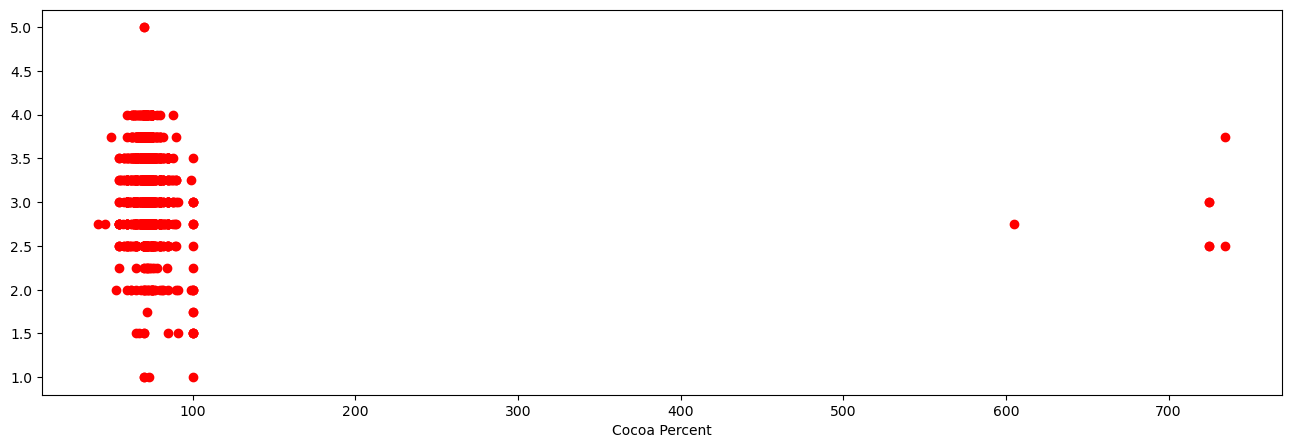

In [22]:
ratings = df.Rating.values
percent = df.CocoaPercent.values
plt.figure(figsize = (16,5))
plt.scatter(percent, ratings, color="red")
plt.xlabel("Cocoa Percent")

In [23]:
df.drop(df[df.CocoaPercent > 100].index, inplace = True)

Text(0.5, 0, 'Cocoa Percent')

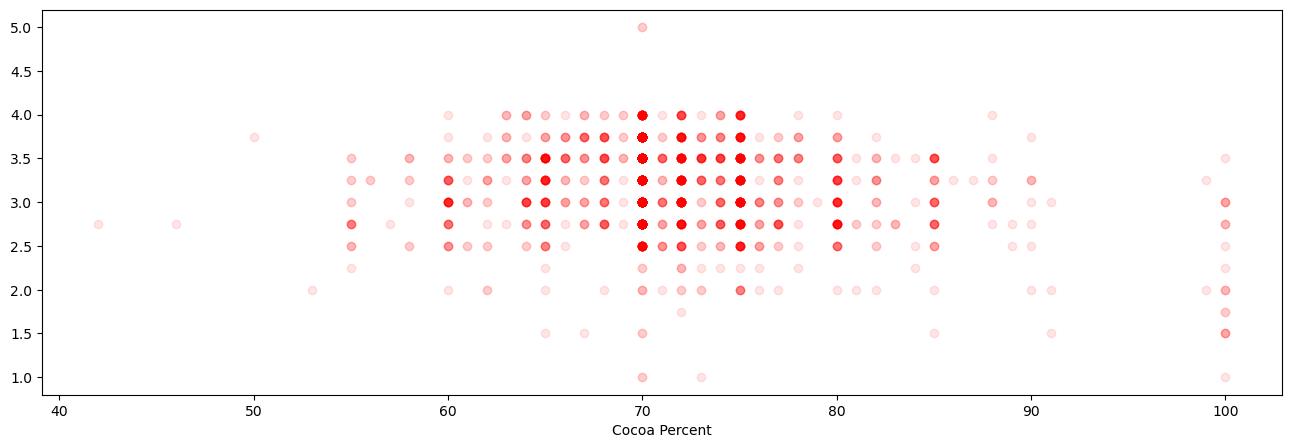

In [25]:
ratings = df.Rating.values
percent = df.CocoaPercent.values
plt.figure(figsize = (16,5))
plt.scatter(percent, ratings, color="red", alpha=0.1)
plt.xlabel("Cocoa Percent")

From what you see, does more cocoa in a bar correspond to a higher rating? No

<h1>Normalization</h1>

Normalize the Ratings Column and print the results.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = df.iloc[:, 6:7].values

x_normalized = scaler.fit_transform(x)

In [29]:
x_normalized

array([[ 1.17923076],
       [-0.91587607],
       [-0.39209936],
       ...,
       [ 0.65545405],
       [ 0.13167735],
       [-0.39209936]])

Challenge Yourself (Optional)

List the companies ordered by their average score (averaged over each company’s reviews).

In [32]:
df.groupby("Company")["Rating"].agg(["mean"]).sort_values(by="mean", ascending=False)

,mean
Company,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
...,...
Ki' Xocolatl,2.000000
Majani,2.000000
Callebaut,1.875000


<h1>Encoding</h1>

Suppose we are interested in the company’s names and locations for some collective analysis. Encode the two categorical columns with the encoder you think is best for the job!

In [33]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df[["Company", "CompanyLocation"]] = enc.fit_transform(df[["Company", "CompanyLocation"]])

In [34]:
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,0.0,Agua Grande,1876,2016,63,18.0,3.75,,Sao Tome
1,0.0,Kpime,1676,2015,70,18.0,2.75,,Togo
2,0.0,Atsane,1676,2015,70,18.0,3.00,,Togo
3,0.0,Akata,1680,2015,70,18.0,3.50,,Togo
4,0.0,Quilla,1704,2015,70,18.0,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,409.0,Peru,647,2011,70,3.0,3.75,,Peru
1791,409.0,Congo,749,2011,65,3.0,3.00,Forastero,Congo
1792,409.0,Kerala State,749,2011,65,3.0,3.50,Forastero,India
1793,409.0,Kerala State,781,2011,62,3.0,3.25,,India
